In [109]:
# --- Importando bibliotecas ---
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, normaltest
from scipy.stats import bernoulli, chisquare, alpha, anglit, arcsine, argus, beta, betaprime, bradford, burr, burr12, cauchy, chi, chi2, cosine, crystalball, dgamma, dweibull, erlang, expon, exponnorm, exponweib, f, fatiguelife, fisk, foldcauchy, foldnorm, genlogistic, gennorm, genpareto, genexpon, genextreme, gausshyper, gamma, gengamma, genhalflogistic, genhyperbolic, geninvgauss, gompertz, gumbel_r, gumbel_l, halfcauchy, halflogistic, halfnorm, hypsecant, invgamma, invgauss, invweibull, johnsonsb, johnsonsu, kappa4, kappa3, ksone, kstwobign, laplace, logistic, loggamma, loglaplace, lognorm, loguniform, lomax, maxwell, mielke, moyal, nakagami, ncx2, ncf, nct, norm, norminvgauss, pareto, pearson3, powerlaw, powerlognorm, powernorm, rdist, rayleigh, recipinvgauss, semicircular, skewcauchy, skewnorm, t, trapezoid, triang, truncexpon, truncnorm, truncpareto, truncweibull_min, tukeylambda, uniform, vonmises, vonmises_line, wald, weibull_min, weibull_max, wrapcauchy
from mpl_toolkits.mplot3d import Axes3D
import unicodedata

In [110]:
# --- 1. Ler o arquivo CSV 2024 ---
# names = [N_casos, nº de casos; SEX, sexo; RA, raça; EP,  exp. percutanea; EM, exp. mucosa; EPi, exp. pele integra; EPni, exp. pele não integra; EXO, exp. outros; MO, Material organico; FE, faixa etaria; ZR, zona de residencia; CAT , emissão de CAT]

# substitua pelo nome correto do seu arquivo .csv
dados2020 = pd.read_csv("bioseguranca_2020_mg.csv", encoding="utf-8")

dados2020 = dados2020.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

# Visualizar as primeiras 5 linhas
print(tabulate(dados2020.head(), headers='keys', tablefmt='pretty'))

+---+-----------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|   |    mes    | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amniotico | MO_flui

In [111]:
dados2021 = pd.read_csv("bioseguranca_2021_mg.csv", encoding="utf-8")

#dados2021 = dados2021.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

print(tabulate(dados2021.head(), headers='keys', tablefmt='pretty'))

+---+-----------+----------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|   |    mes    | N_casos  | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amniotico | MO_fl

In [112]:
dados2022 = pd.read_csv("bioseguranca_2022_mg.csv", encoding="utf-8")

#dados2022 = dados2022.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

print(tabulate(dados2022.head(), headers='keys', tablefmt='pretty'))

+---+-----------+----------+-----------+----------+----------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|   |    mes    | N_casos  | SEX_indef | SEX_masc | SEX_fem  | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amniotico | MO_

In [113]:
dados2023 = pd.read_csv("bioseguranca_2023_mg.csv", encoding="utf-8")

#dados2023 = dados2023.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

print(tabulate(dados2023.head(), headers='keys', tablefmt='pretty'))

+---+-----------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|   |    mes    | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amniotico | MO_flui

In [114]:
dados2024 = pd.read_csv("bioseguranca_2024_mg.csv", encoding="utf-8")

#dados2024 = dados2024.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

print(tabulate(dados2024.head(), headers='keys', tablefmt='pretty'))

+---+-----------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|   |    mes    | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amniotico | MO_flui

In [115]:
# --- 3. Shape da tabela (número de linhas e colunas) ---
print("Número de amostras (linhas, colunas):")
print("2020:", dados2020.shape)
print("2021:", dados2021.shape)
print("2022:", dados2022.shape)
print("2023:", dados2023.shape)
print("2024:", dados2024.shape)

Número de amostras (linhas, colunas):
2020: (12, 52)
2021: (12, 52)
2022: (12, 52)
2023: (12, 52)
2024: (12, 52)


In [116]:
# --- 4. Estatísticas descritivas ---
#df.describe().round(2)
#dados.drop(columns=["mes"]).describe()
#dados = dados.drop(columns=["mes"])
#print(statistics)
print("📊 Estatísticas básicas do dataset:")

print("\n2020")
print(tabulate(dados2020.describe().round(2), headers='keys', tablefmt='pretty'))
stats2020 = dados2020.describe().round(2)

📊 Estatísticas básicas do dataset:

2020
+--------+---------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|        |   mes   | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural 

In [117]:
print("\n2021")
print(tabulate(dados2021.describe().round(2), headers='keys', tablefmt='pretty'))
stats2021 = dados2021.describe().round(2)


2021
+--------+---------+----------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|        |   mes   | N_casos  | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amnio

In [118]:
print("\n2022")
print(tabulate(dados2022.describe().round(2), headers='keys', tablefmt='pretty'))
stats2022 = dados2022.describe().round(2)


2022
+--------+---------+----------+-----------+----------+----------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|        |   mes   | N_casos  | SEX_indef | SEX_masc | SEX_fem  | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amn

In [119]:
print("\n2023")
print(tabulate(dados2023.describe().round(2), headers='keys', tablefmt='pretty'))
stats2023 = dados2023.describe().round(2)


2023
+--------+---------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|        |   mes   | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amnioti

In [120]:
print("\n2024")
print(tabulate(dados2024.describe().round(2), headers='keys', tablefmt='pretty'))
stats2024 = dados2024.describe().round(2)


2024
+--------+---------+---------+-----------+----------+---------+---------+-----------+----------+------------+----------+-------------+--------+--------+--------+--------+--------+--------+---------+---------+---------+-----------+----------+----------+---------+---------+---------+--------+-----------+-----------+-------------------+------------------+------------------+------------------+----------------+-----------+------------+----------+-----------+------------+------------+------------+------------+------------+--------+--------+-----------+----------+---------------+---------+---------+---------+--------------+
|        |   mes   | N_casos | SEX_indef | SEX_masc | SEX_fem | RA_ndec | RA_branco | RA_negro | RA_amarelo | RA_pardo | RA_indigena | EP_ign | EP_sim | EP_nao | EM_ign | EM_sim | EM_nao | EPi_ign | EPi_sim | EPi_nao | EPni__ign | EPni_sim | EPni_nao | EXO_ign | EXO_sim | EXO_nao | MO_ign | MO_sangue | MO_liquor | MO_liquor_pleural | MO_liquor_ascite | MO_liq_amnioti

In [ ]:
plt.figure(figsize=(12,6))

# Lista com nomes dos meses
meses = [
    "Janeiro", "Fevereiro", "Março", "Abril",
    "Maio", "Junho", "Julho", "Agosto",
    "Setembro", "Outubro", "Novembro", "Dezembro"
]

# Plota cada ano
plt.plot(range(1, 13), dados2020["N_casos"], marker="o", label="2020")
plt.plot(range(1, 13), dados2021["N_casos"], marker="o", label="2021")
plt.plot(range(1, 13), dados2022["N_casos"], marker="o", label="2022")
plt.plot(range(1, 13), dados2023["N_casos"], marker="o", label="2023")
plt.plot(range(1, 13), dados2024["N_casos"], marker="o", label="2024")

# Ajusta o eixo X para mostrar nomes dos meses
plt.xticks(range(1, 13), meses, rotation=45)

# Configurações gerais
plt.xlabel("Mês")
plt.ylabel("Número de Casos")
plt.title("Evolução mensal de acidentes (2020–2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# --- 5. Grafico da evolução mensal/ano ---
plt.figure(figsize=(12,6))
plt.plot(dados2020["mes"], dados2020["N_casos"], marker="o", label="2020")

plt.xlabel("Mês")
plt.ylabel("Número de Casos")
plt.title("Evolução mensal de acidentes em 2020")
plt.legend()
plt.grid()
plt.show()

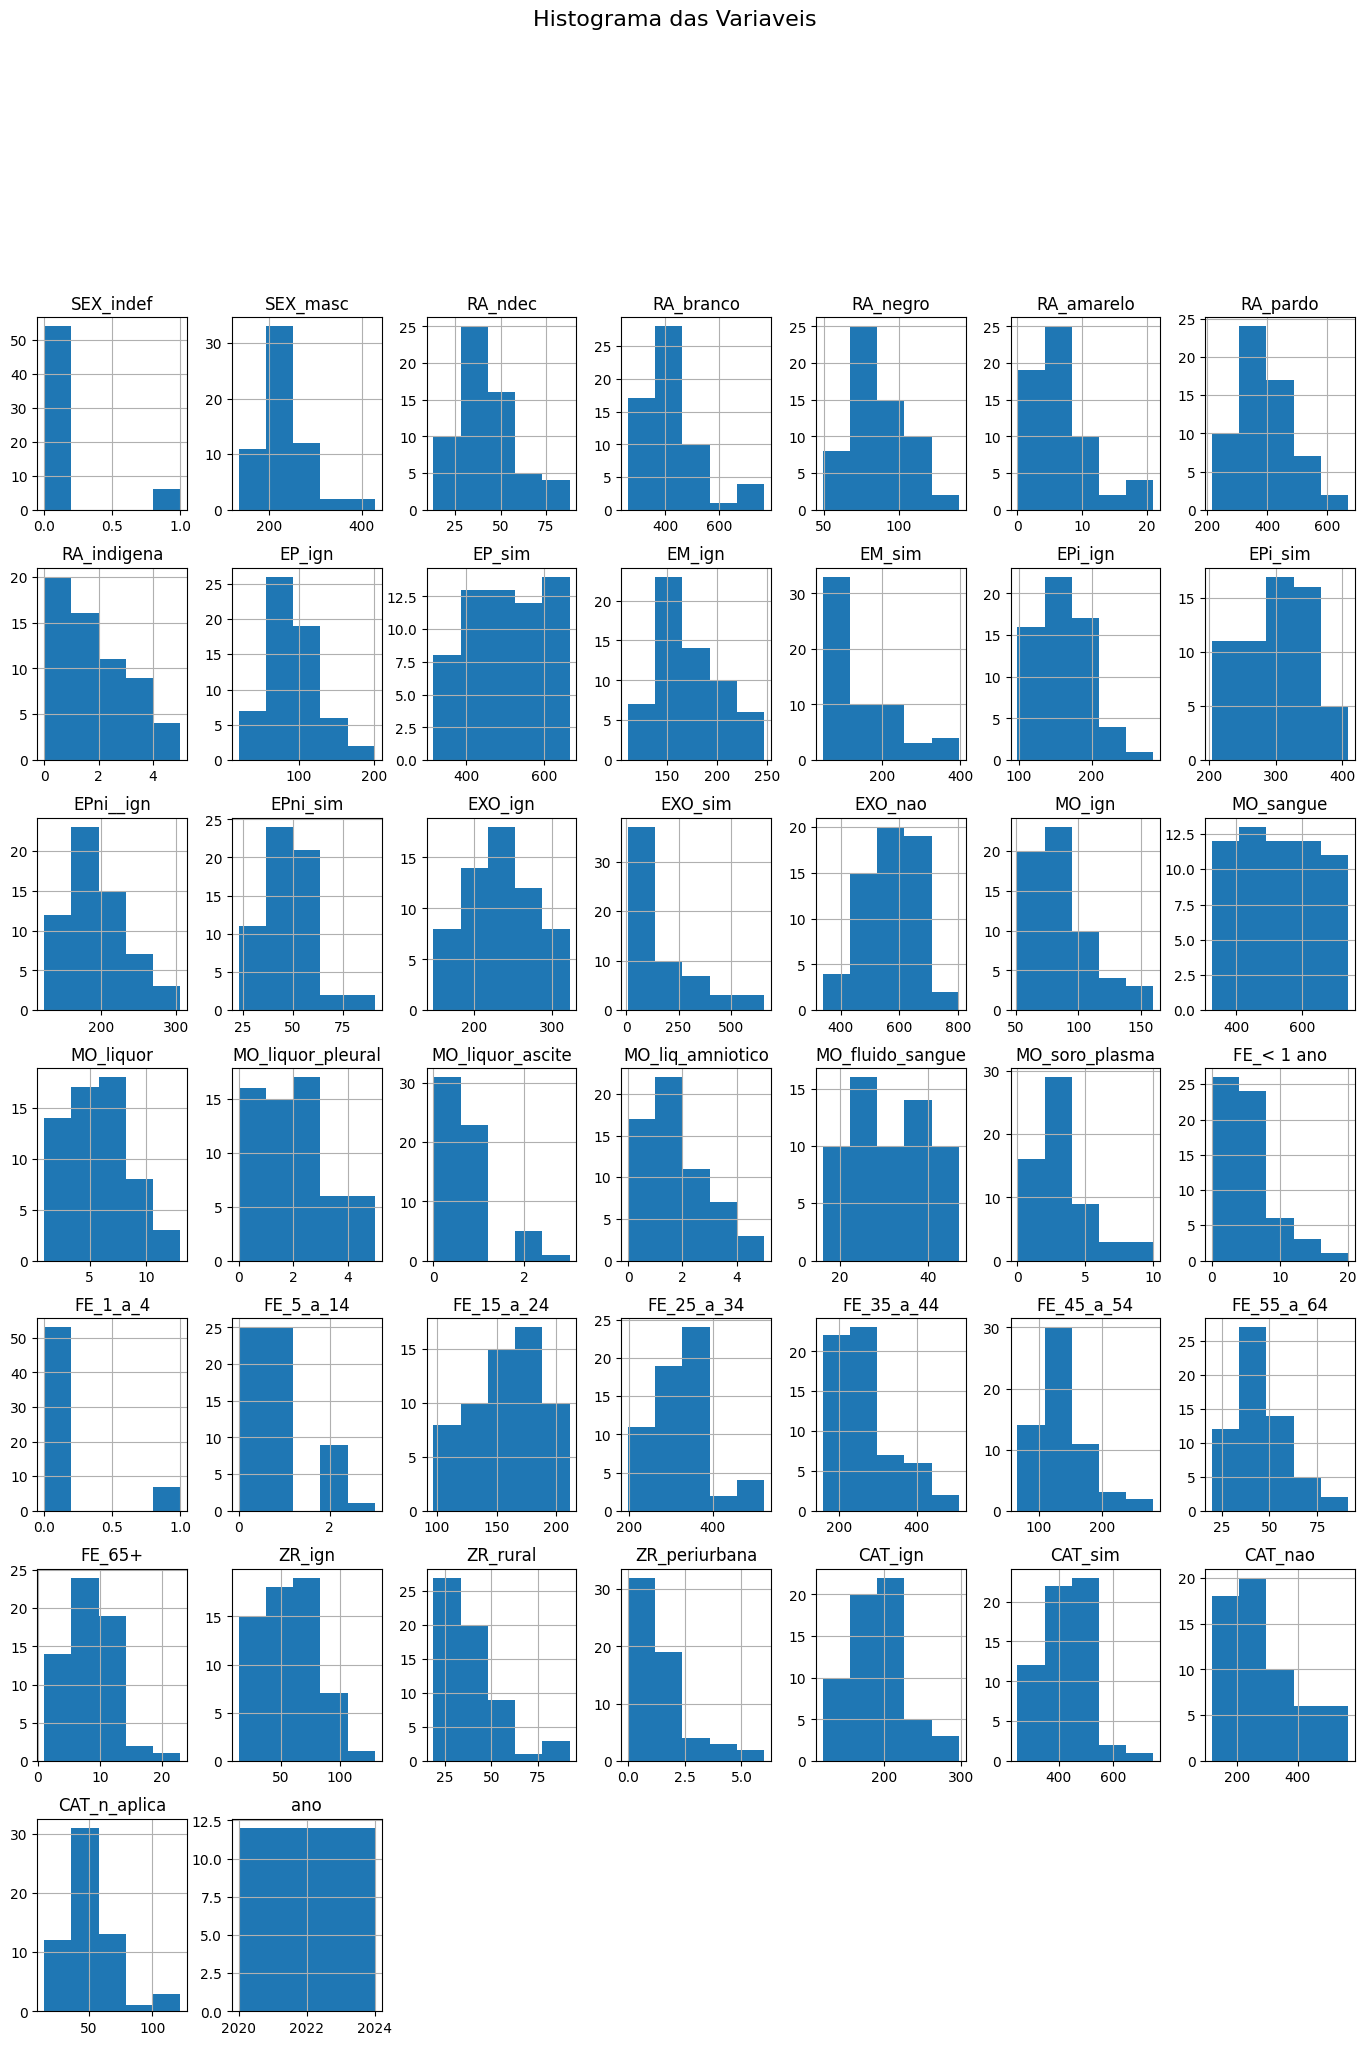

In [123]:
# --- 5. Histograma ---
dados_completos.hist(bins=5, figsize=(17, 22))
plt.suptitle('Histograma das Variaveis', x=0.5, y=1.02, fontsize=16)
plt.show()

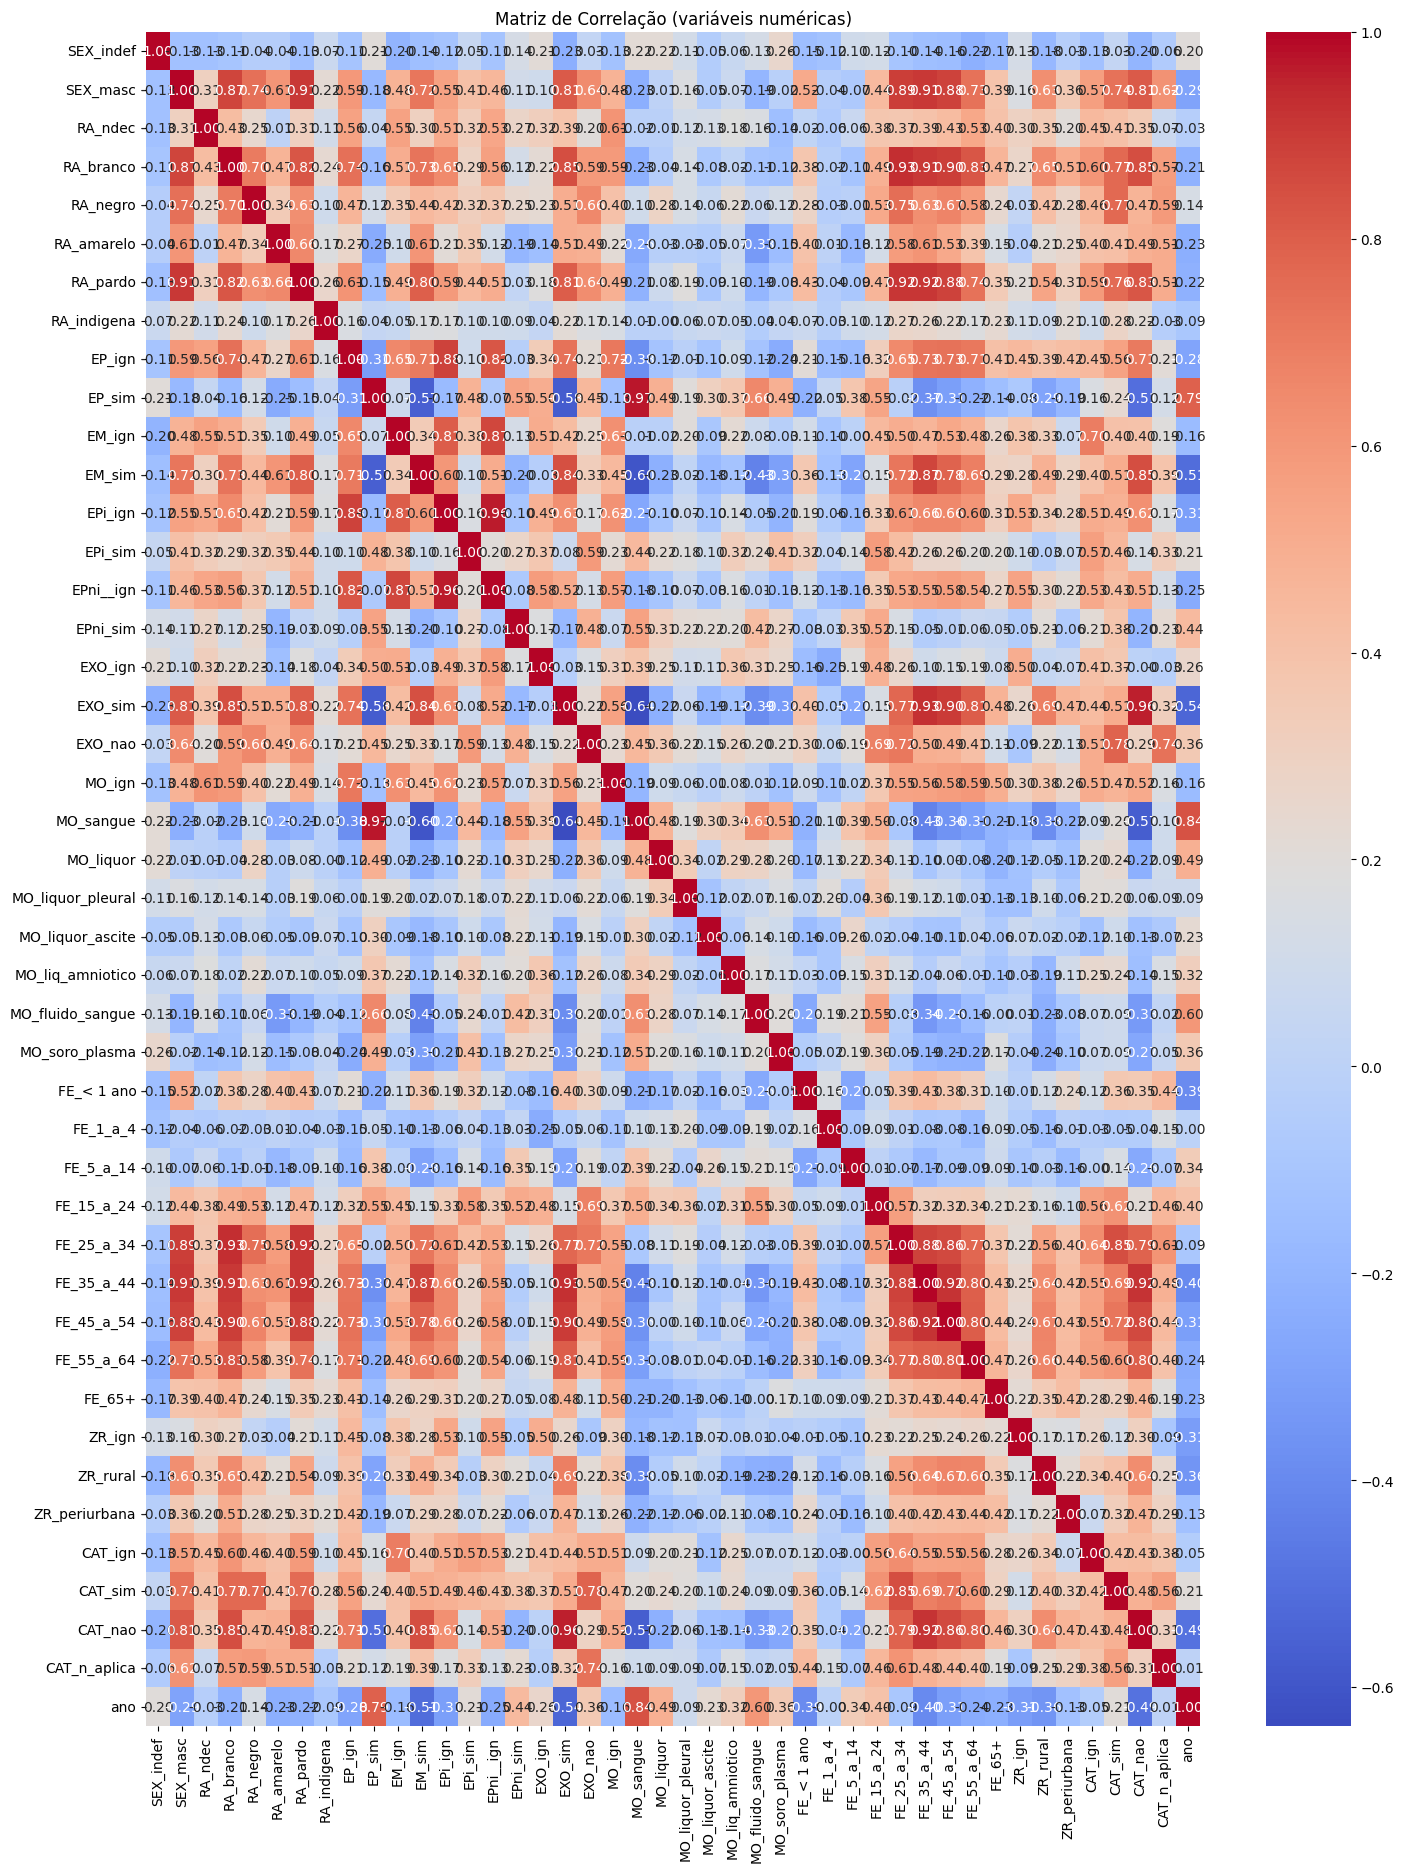

In [124]:
# --- 6. Matriz de correlação ---
# vamos considerar apenas colunas numéricas
plt.figure(figsize=(17, 22))
sns.heatmap(dados_completos.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação (variáveis numéricas)")
plt.show()